In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [31]:
raw_file = pd.read_excel('Brixx-and-Barley-Long-Beach-New-York.xlsx', index_col = 2)
print('Shape of the dataframe: ', raw_file.shape)
raw_file.head()

Shape of the dataframe:  (979, 3)


,reviewBody,stars,platform
date_posted,,,
04/13/2020,Full on make a buck . Good is ok.,3.0,Google
09/06/2019,Great happy hour food nice service atmosphere ...,2.0,Google
09/29/2018,What can I say about Brixx and Barley? How abo...,5.0,Yelp
01/06/2020,I asked for a vegan burger patty and got MEATB...,2.0,Seamless
10/16/2018,One of the few bars/restaurants that have live...,5.0,Google


### Convert the index to datetimeindex

In [32]:
raw_file.index = pd.DatetimeIndex(data = raw_file.index)
raw_file.index

DatetimeIndex(['2020-04-13', '2019-09-06', '2018-09-29', '2020-01-06',
               '2018-10-16', '2018-09-23', '2017-10-07', '2019-02-18',
               '2020-07-01', '2018-10-12',
               ...
               '2020-06-24', '2016-09-30', '2019-11-24', '2016-09-19',
               '2019-10-01', '2020-04-12', '2017-10-04', '2018-12-24',
               '2019-10-11', '2015-10-14'],
              dtype='datetime64[ns]', name='date_posted', length=979, freq=None)

### Get average star ratings for each platform for each year

In [33]:
yerly_grouped_result = raw_file.groupby(by = ['platform', raw_file.index.year]).mean()

In [34]:
yerly_grouped_result

stars
platform date_posted          
Facebook 2014         5.000000
         2015         4.266667
         2016         4.523810
         2017         4.295775
         2018         4.393939
         2019         5.000000
         2020         5.000000
Google   2014         5.000000
         2015         4.428571
         2016         3.285714
         2017         3.772727
         2018         4.270833
         2019         4.250000
         2020         3.625000
Grubhub  2020         3.971429
Seamless 2019         2.250000
         2020         3.608696
Yelp     2015         2.333333
         2016         3.750000
         2017         3.581081
         2018         3.626016
         2019         3.529412
         2020         3.814815

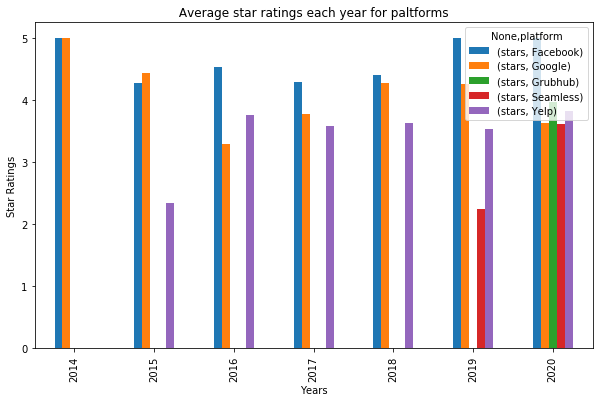

In [47]:
raw_file.groupby(by = [ raw_file.index.year, 'platform']).mean().unstack().plot.bar(figsize = (10,6))
plt.xlabel('Years')
plt.ylabel('Star Ratings')
plt.title(' Average star ratings each year for paltforms ')
plt.show()